# Example of Performing Linear Least Squares Fitting

First, import numpy and matplotlib as usual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now, generate some random data about a trend line

In [2]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0, 10, npoints)

#set slop, intercept, and scatter rms
m = 2.0
b = 1.0
sigma =2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

Text(0, 0.5, 'y')

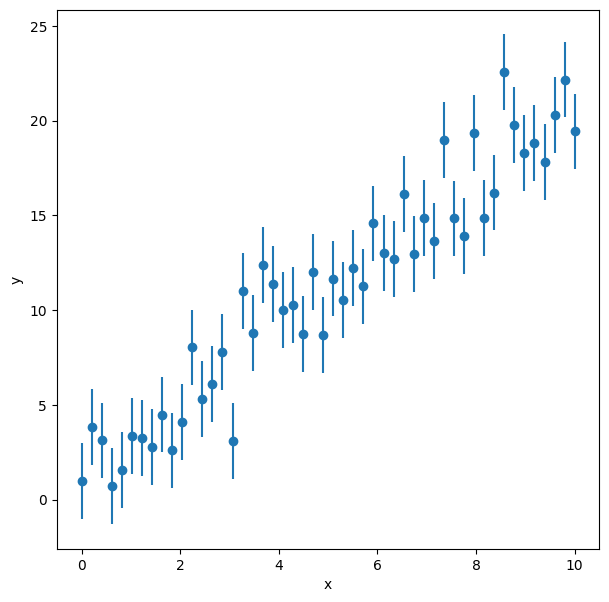

In [3]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, sigma, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

## Method 1: polyfit()

The polyfit routine from numpy fits dta with a polynomial of degree

An affine function (straight line) is a polynomial of degree 1.

In [4]:
# 'w' is the 'weight' given to each point. Small error = big weight, and vice versa
m_fit, b_fit = np.poly1d(np.polyfit(x, y, 1, w=1./y_err))
print(m_fit, b_fit)

1.9634043470399505 1.283010681296193


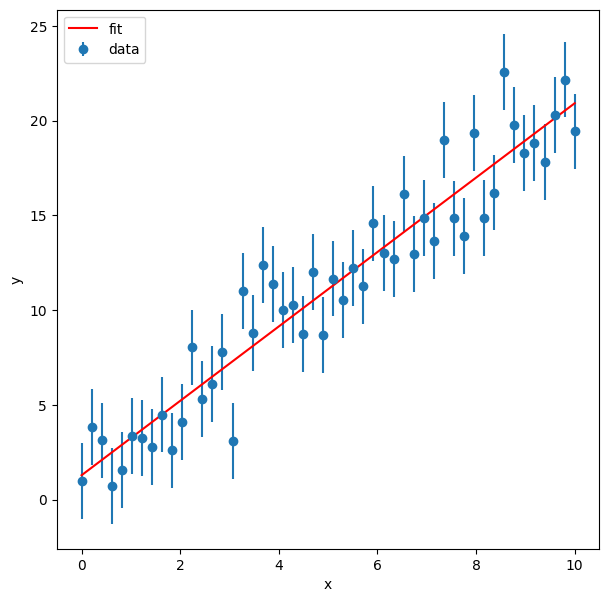

In [5]:
f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, y_err, fmt='o', label = 'data')
plt.plot(x, m_fit*x+b_fit, 'r-', label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2)
plt.show()

## Method 2: scipy + optimize

In [6]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, m, b):
    return m*x + b

#perform the fit
params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err)

#params contains values of m and b that fit the line 'the best' 
m_fit2 = params[0]
b_fit2 = params[1]

#params_cov contains other information about how good the fit is
perr = np.sqrt(np.diag(params_cov)) #extract the diagonal, apply square root
m_fit2_err = perr[0]
b_fit2_err = perr[1]

print(f'The slope is {m_fit2: .5f} +- {m_fit2_err: .5f}')
print(f'The intercept is {b_fit2: .5f} +- {b_fit2_err: .5f}')

The slope is  1.96340 +-  0.08956
The intercept is  1.28301 +-  0.51971


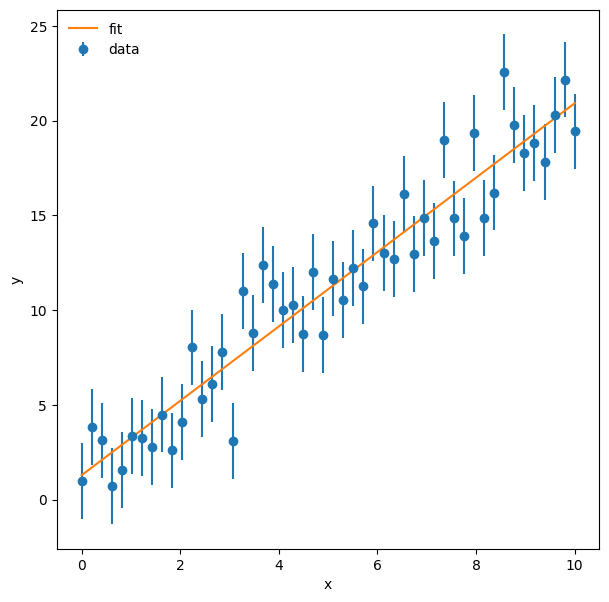

In [8]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x, y, y_err, fmt='o', label = 'data')
plt.plot(x, f_line(x, m_fit2, b_fit2), label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2, frameon=False)